# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import train dataframe

In [2]:
df_train = pd.read_csv("./data/train/df_train.csv", encoding='utf-8')
# Convert the name of the columns to uppercase
df_train.columns = map(str.upper, df_train.columns)
df_train['NUM_WORDS'] = df_train['PALABRAS_EMPLEO_TEXTO'].apply(lambda x: len(x.split(" ")) - 1)
df_train.head(2)

,ID_OFERTA,SUBCATEGORIA,CATEGORIA,PALABRAS_EMPLEO_TEXTO,ID_PUESTO_ESCO,ID_PUESTO_ESCO_ULL,NUM_WORDS
0,ef5a8ae0a743018628df9bd53893bb,Administraciï¿½n,Administraciï¿½n de empresas,ADMINISTRATIVO INGLES NAVISION EMPRESAS CARACT...,1634,1634,13
1,47137c06a640348ca4cb7dcbf938b1,Medicina general,Sanidad y salud,MEDICO MEDICINA DIAGNOSTICO TRATAMIENTO LICENC...,611,611,10


# Group by occupations

In [22]:
# Group the dataframe by ID_PUESTO_ESCO_ULL and calculate the mean of the 'NUM_WORDS' column
df_train_grouped = df_train.groupby('ID_PUESTO_ESCO_ULL')['NUM_WORDS'].agg(['mean']).reset_index()
# Count the occurrences of each unique value in the 'ID_PUESTO_ESCO_ULL' column
counts = df_train['ID_PUESTO_ESCO_ULL'].value_counts()

# Create a DataFrame from the counts
df_counts = counts.reset_index()

# Rename the columns for clarity
df_counts.columns = ['ID_PUESTO_ESCO_ULL', 'Count']

# Sort the DataFrame by 'ID_PUESTO_ESCO_ULL' and reset the index
df_counts = df_counts.sort_values(by='ID_PUESTO_ESCO_ULL').reset_index(drop=True)

# Now join both dataframes
df_train_grouped = df_train_grouped.join(df_counts['Count'])
df_train_grouped.head(2)

,ID_PUESTO_ESCO_ULL,mean,Count
0,33,27.000000,5
1,39,41.355556,45


# Visualize the Mean of words Vs Num of offers

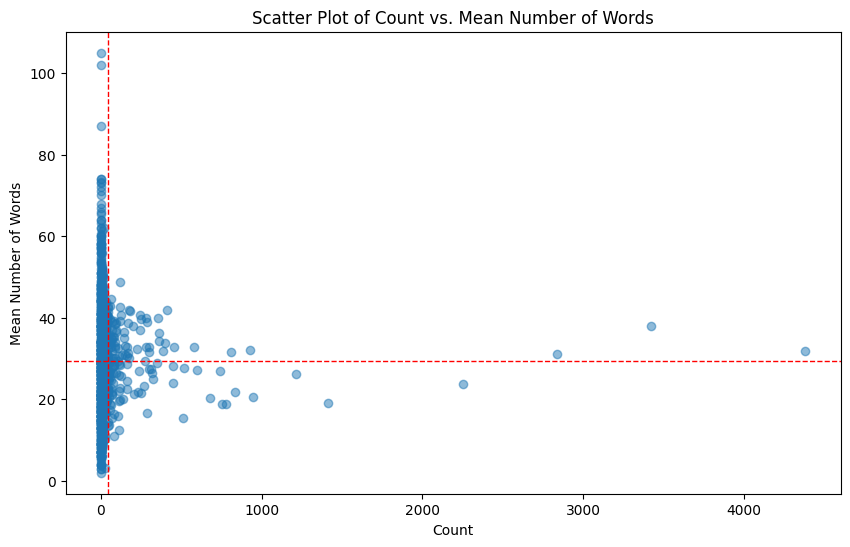

In [4]:
# Scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(df_train_grouped['Count'], df_train_grouped['mean'], alpha=0.5)  # alpha controls the transparency of points

# Now represent a vertical line at the mean of the 'Count' column
plt.axvline(df_train_grouped['Count'].mean(), color='red', linestyle='dashed', linewidth=1)
# Now represent a horizontal line at the mean of the 'mean' column
plt.axhline(df_train_grouped['mean'].mean(), color='red', linestyle='dashed', linewidth=1)

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Mean Number of Words')
plt.title('Scatter Plot of Count vs. Mean Number of Words')

# Show the plot
plt.show()

# Zoom for lesser offers

Loading BokehJS ...

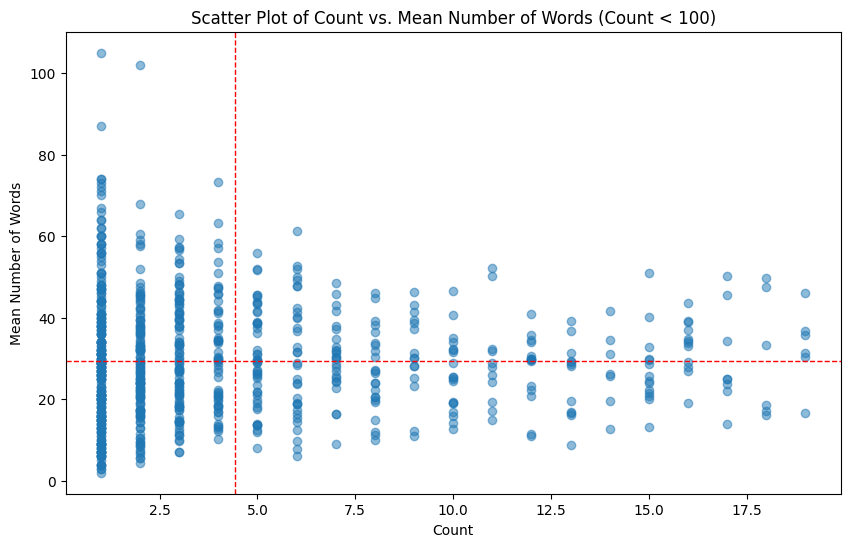

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from bokeh.plotting import figure, show, output_notebook, output_file
from bokeh.models import HoverTool, ColumnDataSource

# Filter the DataFrame to include only rows where 'Count' is less than 20
filtered_df = df_train_grouped[df_train_grouped['Count'] < 20]

# Matplotlib Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Count'], filtered_df['mean'], alpha=0.5)
plt.axvline(filtered_df['Count'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axhline(filtered_df['mean'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Count')
plt.ylabel('Mean Number of Words')
plt.title('Scatter Plot of Count vs. Mean Number of Words (Count < 100)')

# Bokeh Scatter Plot with Hover
source = ColumnDataSource(filtered_df)

p = figure(width=800, height=500, title='Scatter Plot of Count vs. Mean Number of Words (Count < 100)')
p.circle(x='Count', y='mean', source=source, size=10, color='blue', alpha=0.5)

hover = HoverTool()
hover.tooltips = [("ID_PUESTO_ESCO_ULL", "@ID_PUESTO_ESCO_ULL"),
                  ("Count", "@Count"),
                  ("Mean", "@mean")]

p.add_tools(hover)

# Specify the output HTML file
output_file("scatter_plot_interactive.html")

output_notebook()
show(p)


In [25]:
import plotly.express as px
# Create a scatter plot with hover information
fig = px.scatter(df_train_grouped, x='Count', y='mean', text='ID_PUESTO_ESCO_ULL', title='Scatter Plot')

# Update hover text to include 'Count' and 'mean'
# fig.update_traces(texttemplate='%{text}<br>Count: %{x}<br>Mean: %{y}', textposition='top center')

# Customize the layout
fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Mean',
    hovermode='closest'
)

# Save the HTML plot
fig.write_html("scatter_plot.html")

# Delete offers with less than 5 words

In [19]:

# Delete all rows with less than 5 words
print("Before: ", df_train.shape[0])
df_words_problem = df_train[df_train['NUM_WORDS'] <= 5]
df_train = df_train[df_train['NUM_WORDS'] > 5]
print("After: ", df_train.shape[0])

Before:  48893
After:  47638


In [22]:
df_words_problem.head(10)
df_words_problem.to_csv("./data/train/df_words_problem.csv", index=False, encoding='utf-8')

# Delete all occupations with more than 1000 offers and less than 10 offers

Number of unique ID_PUESTO_ESCO_ULL:  1007


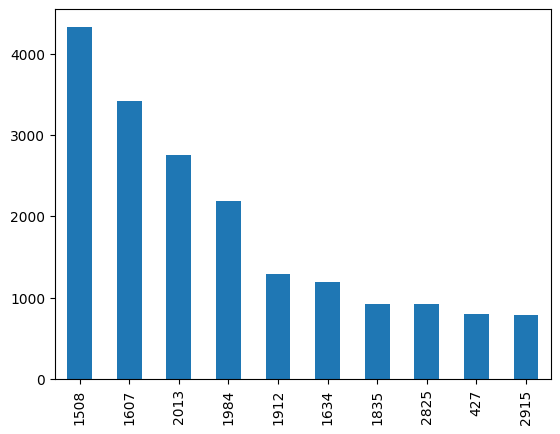

In [26]:
# Get the number of repetitions for each ID_PUESTO_ESCO_ULL
counts = df_train['ID_PUESTO_ESCO_ULL'].value_counts()
print("Number of unique ID_PUESTO_ESCO_ULL: ", len(counts))
# Plot the histogram of the top 10 with more repetitions sorted by the number of repetitions
counts[:10].plot(kind='bar')
plt.show()


In [ ]:
# Delete randomly the register for number of ID_PUESTO_ESCO_ULL > 1000 to balance the dataset, but delete randomly
# the register for number of ID_PUESTO_ESCO_ULL < 1000 to balance the dataset
print("Before: ", df_train.shape[0])
# df_train = df_train[df_train['ID_PUESTO_ESCO_ULL'].isin(counts[counts < 1000].index)] This line deletes the ID_PUESTO_ESCO_ULL with less than 1000 repetitions
print("After: ", df_train.shape[0])